In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# loading the dataset into a dataframe
df = pd.read_csv("Earthquake_of_last_30 days.csv") 
df

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2023-02-14T21:31:52.124Z,60.828300,-151.841200,85.000,2.20,ml,NaN,NaN,NaN,1.6100,...,2023-02-14T21:35:21.982Z,"33 km WNW of Nikiski, Alaska",earthquake,NaN,2.100,NaN,NaN,automatic,ak,ak
1,2023-02-14T20:45:56.420Z,19.254333,-155.410828,31.320,2.27,ml,41.0,139.00,NaN,0.1500,...,2023-02-14T20:51:26.040Z,"9 km NE of Pāhala, Hawaii",earthquake,0.66,0.810,2.790,10.0,automatic,hv,hv
2,2023-02-14T20:45:12.919Z,38.146900,-117.982000,7.300,1.90,ml,11.0,110.46,0.02000,0.1385,...,2023-02-14T21:04:41.699Z,Nevada,earthquake,NaN,1.300,0.210,9.0,reviewed,nn,nn
3,2023-02-14T20:43:53.796Z,63.898700,-148.655300,82.400,1.30,ml,NaN,NaN,NaN,0.5700,...,2023-02-14T20:46:28.820Z,"15 km ENE of Healy, Alaska",earthquake,NaN,1.500,NaN,NaN,automatic,ak,ak
4,2023-02-14T20:43:40.220Z,33.324167,-116.757167,12.420,0.89,ml,23.0,67.00,0.08796,0.1700,...,2023-02-14T21:22:42.029Z,"9km N of Lake Henshaw, CA",earthquake,0.26,1.000,0.133,8.0,reviewed,ci,ci
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10148,2023-01-15T21:45:41.552Z,41.507200,19.986200,10.000,4.10,mb,32.0,40.00,0.18500,0.6600,...,2023-01-26T02:26:34.175Z,Albania,earthquake,4.68,1.972,0.301,3.0,reviewed,us,us
10149,2023-01-15T21:42:53.540Z,33.323167,-116.900333,19.470,1.28,ml,42.0,39.00,0.12820,0.1600,...,2023-01-17T23:04:14.863Z,"5km SW of Palomar Observatory, CA",earthquake,0.18,0.500,0.223,23.0,reviewed,ci,ci
10150,2023-01-15T21:42:37.119Z,62.524300,-149.442100,50.900,1.10,ml,NaN,NaN,NaN,0.4800,...,2023-01-30T21:47:30.436Z,"35 km ENE of Chase, Alaska",earthquake,NaN,0.600,NaN,NaN,reviewed,ak,ak
10151,2023-01-15T21:39:04.248Z,63.160500,-150.495600,112.900,1.70,ml,NaN,NaN,NaN,0.4000,...,2023-01-30T21:47:30.191Z,"74 km SE of Denali National Park, Alaska",earthquake,NaN,0.400,NaN,NaN,reviewed,ak,ak


In [4]:
print(df.columns)
print(len(df.columns))

Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'nst',
       'gap', 'dmin', 'rms', 'net', 'id', 'updated', 'place', 'type',
       'horizontalError', 'depthError', 'magError', 'magNst', 'status',
       'locationSource', 'magSource'],
      dtype='object')
22


In [5]:
df.isnull().sum()

time                  0
latitude              0
longitude             0
depth                 0
mag                   0
magType               0
nst                2735
gap                2735
dmin               4246
rms                   0
net                   0
id                    0
updated               0
place                 0
type                  0
horizontalError    3268
depthError            0
magError           2793
magNst             2746
status                0
locationSource        0
magSource             0
dtype: int64

In [6]:
#Drop the columns with a large number of missing values (dmin, magError, and magNst), and some other columns 
#as they may not contribute significantly to your analysis
df=df.drop(["updated","place", "type","horizontalError", "depthError", "status","locationSource","magNst","magError","magNst","magSource","magError"],
        axis=1)

df

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id
0,2023-02-14T21:31:52.124Z,60.828300,-151.841200,85.000,2.20,ml,NaN,NaN,NaN,1.6100,ak,ak02322rvh1o
1,2023-02-14T20:45:56.420Z,19.254333,-155.410828,31.320,2.27,ml,41.0,139.00,NaN,0.1500,hv,hv73324562
2,2023-02-14T20:45:12.919Z,38.146900,-117.982000,7.300,1.90,ml,11.0,110.46,0.02000,0.1385,nn,nn00856070
3,2023-02-14T20:43:53.796Z,63.898700,-148.655300,82.400,1.30,ml,NaN,NaN,NaN,0.5700,ak,ak02322rcmig
4,2023-02-14T20:43:40.220Z,33.324167,-116.757167,12.420,0.89,ml,23.0,67.00,0.08796,0.1700,ci,ci40414688
...,...,...,...,...,...,...,...,...,...,...,...,...
10148,2023-01-15T21:45:41.552Z,41.507200,19.986200,10.000,4.10,mb,32.0,40.00,0.18500,0.6600,us,us7000j4kl
10149,2023-01-15T21:42:53.540Z,33.323167,-116.900333,19.470,1.28,ml,42.0,39.00,0.12820,0.1600,ci,ci40402928
10150,2023-01-15T21:42:37.119Z,62.524300,-149.442100,50.900,1.10,ml,NaN,NaN,NaN,0.4800,ak,ak023p5te15
10151,2023-01-15T21:39:04.248Z,63.160500,-150.495600,112.900,1.70,ml,NaN,NaN,NaN,0.4000,ak,ak023p5sod9


In [7]:
print(df.columns)
print(len(df.columns))

Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'nst',
       'gap', 'dmin', 'rms', 'net', 'id'],
      dtype='object')
12


In [8]:
new_column_names = ["Date(YYYY/MM/DD)", "Latitude(deg)", "Longitude(deg)", "Depth(km)", "Magnitude(ergs)", 
                    "Magnitude_type", "No_of_Stations", "Gap", "Close", "RMS", "SRC", "EventID"]

df.columns=new_column_names

display(df)

,Date(YYYY/MM/DD),Latitude(deg),Longitude(deg),Depth(km),Magnitude(ergs),Magnitude_type,No_of_Stations,Gap,Close,RMS,SRC,EventID
0,2023-02-14T21:31:52.124Z,60.828300,-151.841200,85.000,2.20,ml,NaN,NaN,NaN,1.6100,ak,ak02322rvh1o
1,2023-02-14T20:45:56.420Z,19.254333,-155.410828,31.320,2.27,ml,41.0,139.00,NaN,0.1500,hv,hv73324562
2,2023-02-14T20:45:12.919Z,38.146900,-117.982000,7.300,1.90,ml,11.0,110.46,0.02000,0.1385,nn,nn00856070
3,2023-02-14T20:43:53.796Z,63.898700,-148.655300,82.400,1.30,ml,NaN,NaN,NaN,0.5700,ak,ak02322rcmig
4,2023-02-14T20:43:40.220Z,33.324167,-116.757167,12.420,0.89,ml,23.0,67.00,0.08796,0.1700,ci,ci40414688
...,...,...,...,...,...,...,...,...,...,...,...,...
10148,2023-01-15T21:45:41.552Z,41.507200,19.986200,10.000,4.10,mb,32.0,40.00,0.18500,0.6600,us,us7000j4kl
10149,2023-01-15T21:42:53.540Z,33.323167,-116.900333,19.470,1.28,ml,42.0,39.00,0.12820,0.1600,ci,ci40402928
10150,2023-01-15T21:42:37.119Z,62.524300,-149.442100,50.900,1.10,ml,NaN,NaN,NaN,0.4800,ak,ak023p5te15
10151,2023-01-15T21:39:04.248Z,63.160500,-150.495600,112.900,1.70,ml,NaN,NaN,NaN,0.4000,ak,ak023p5sod9


In [9]:
print(df)

               Date(YYYY/MM/DD)  Latitude(deg)  Longitude(deg)  Depth(km)  \
0      2023-02-14T21:31:52.124Z      60.828300     -151.841200     85.000   
1      2023-02-14T20:45:56.420Z      19.254333     -155.410828     31.320   
2      2023-02-14T20:45:12.919Z      38.146900     -117.982000      7.300   
3      2023-02-14T20:43:53.796Z      63.898700     -148.655300     82.400   
4      2023-02-14T20:43:40.220Z      33.324167     -116.757167     12.420   
...                         ...            ...             ...        ...   
10148  2023-01-15T21:45:41.552Z      41.507200       19.986200     10.000   
10149  2023-01-15T21:42:53.540Z      33.323167     -116.900333     19.470   
10150  2023-01-15T21:42:37.119Z      62.524300     -149.442100     50.900   
10151  2023-01-15T21:39:04.248Z      63.160500     -150.495600    112.900   
10152  2023-01-15T21:37:21.608Z      41.451300       19.999500     16.295   

       Magnitude(ergs) Magnitude_type  No_of_Stations     Gap    Close  \
0

In [10]:
# Display the shape of the data (number of rows and columns)
df.shape

(10153, 12)

In [11]:
# Display the first 5 rows of data
df.head()


,Date(YYYY/MM/DD),Latitude(deg),Longitude(deg),Depth(km),Magnitude(ergs),Magnitude_type,No_of_Stations,Gap,Close,RMS,SRC,EventID
0,2023-02-14T21:31:52.124Z,60.828300,-151.841200,85.00,2.20,ml,NaN,NaN,NaN,1.6100,ak,ak02322rvh1o
1,2023-02-14T20:45:56.420Z,19.254333,-155.410828,31.32,2.27,ml,41.0,139.00,NaN,0.1500,hv,hv73324562
2,2023-02-14T20:45:12.919Z,38.146900,-117.982000,7.30,1.90,ml,11.0,110.46,0.02000,0.1385,nn,nn00856070
3,2023-02-14T20:43:53.796Z,63.898700,-148.655300,82.40,1.30,ml,NaN,NaN,NaN,0.5700,ak,ak02322rcmig
4,2023-02-14T20:43:40.220Z,33.324167,-116.757167,12.42,0.89,ml,23.0,67.00,0.08796,0.1700,ci,ci40414688


In [12]:
# Display the last 5 rows of data
df.tail()

,Date(YYYY/MM/DD),Latitude(deg),Longitude(deg),Depth(km),Magnitude(ergs),Magnitude_type,No_of_Stations,Gap,Close,RMS,SRC,EventID
10148,2023-01-15T21:45:41.552Z,41.507200,19.986200,10.000,4.10,mb,32.0,40.0,0.1850,0.66,us,us7000j4kl
10149,2023-01-15T21:42:53.540Z,33.323167,-116.900333,19.470,1.28,ml,42.0,39.0,0.1282,0.16,ci,ci40402928
10150,2023-01-15T21:42:37.119Z,62.524300,-149.442100,50.900,1.10,ml,NaN,NaN,NaN,0.48,ak,ak023p5te15
10151,2023-01-15T21:39:04.248Z,63.160500,-150.495600,112.900,1.70,ml,NaN,NaN,NaN,0.40,ak,ak023p5sod9
10152,2023-01-15T21:37:21.608Z,41.451300,19.999500,16.295,4.90,mb,105.0,37.0,0.1460,0.74,us,us7000j4kh


In [13]:
# Count the number of missing values in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10153 entries, 0 to 10152
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date(YYYY/MM/DD)  10153 non-null  object 
 1   Latitude(deg)     10153 non-null  float64
 2   Longitude(deg)    10153 non-null  float64
 3   Depth(km)         10153 non-null  float64
 4   Magnitude(ergs)   10153 non-null  float64
 5   Magnitude_type    10153 non-null  object 
 6   No_of_Stations    7418 non-null   float64
 7   Gap               7418 non-null   float64
 8   Close             5907 non-null   float64
 9   RMS               10153 non-null  float64
 10  SRC               10153 non-null  object 
 11  EventID           10153 non-null  object 
dtypes: float64(8), object(4)
memory usage: 952.0+ KB


In [14]:
df.describe()

,Latitude(deg),Longitude(deg),Depth(km),Magnitude(ergs),No_of_Stations,Gap,Close,RMS
count,10153.000000,10153.000000,10153.000000,10153.000000,7418.000000,7418.000000,5907.000000,10153.000000
mean,41.801063,-114.365448,25.156869,1.633922,24.434214,118.977227,0.644097,0.305298
std,18.817115,68.809055,52.693639,1.303551,23.647302,64.152541,1.994248,0.286541
min,-64.428900,-179.994000,-3.490000,-1.120000,0.000000,11.000000,0.000000,0.000000
25%,34.710300,-152.329700,2.930000,0.800000,9.000000,69.000000,0.013705,0.080000
50%,38.832668,-122.814835,8.800000,1.310000,17.000000,103.000000,0.058460,0.170000
75%,58.244667,-116.720167,25.420000,2.100000,32.000000,158.000000,0.245000,0.510000
max,84.884100,179.984000,635.507000,7.800000,345.000000,352.540000,41.027000,3.360000


In [15]:
# Display the data types of each column
df.dtypes

Date(YYYY/MM/DD)     object
Latitude(deg)       float64
Longitude(deg)      float64
Depth(km)           float64
Magnitude(ergs)     float64
Magnitude_type       object
No_of_Stations      float64
Gap                 float64
Close               float64
RMS                 float64
SRC                  object
EventID              object
dtype: object

In [16]:
df['Date(YYYY/MM/DD)'] = pd.to_datetime(df['Date(YYYY/MM/DD)'])


In [17]:
df.dtypes

Date(YYYY/MM/DD)    datetime64[ns, UTC]
Latitude(deg)                   float64
Longitude(deg)                  float64
Depth(km)                       float64
Magnitude(ergs)                 float64
Magnitude_type                   object
No_of_Stations                  float64
Gap                             float64
Close                           float64
RMS                             float64
SRC                              object
EventID                          object
dtype: object

In [18]:
# Count the number of missing values in each column
df.isnull().sum()

Date(YYYY/MM/DD)       0
Latitude(deg)          0
Longitude(deg)         0
Depth(km)              0
Magnitude(ergs)        0
Magnitude_type         0
No_of_Stations      2735
Gap                 2735
Close               4246
RMS                    0
SRC                    0
EventID                0
dtype: int64

In [19]:
for i in df.columns:
    print(i,df[i].unique())
    print("------------------------------------------------------------------------------")

Date(YYYY/MM/DD) <DatetimeArray>
['2023-02-14 21:31:52.124000+00:00', '2023-02-14 20:45:56.420000+00:00',
 '2023-02-14 20:45:12.919000+00:00', '2023-02-14 20:43:53.796000+00:00',
 '2023-02-14 20:43:40.220000+00:00', '2023-02-14 20:38:00.090000+00:00',
 '2023-02-14 20:06:52.620000+00:00', '2023-02-14 20:00:33.250000+00:00',
 '2023-02-14 19:57:08.094000+00:00', '2023-02-14 19:56:12.040000+00:00',
 ...
 '2023-01-15 21:57:33.424000+00:00', '2023-01-15 21:51:40.652000+00:00',
 '2023-01-15 21:46:59.668000+00:00', '2023-01-15 21:46:29.715000+00:00',
 '2023-01-15 21:46:06.332000+00:00', '2023-01-15 21:45:41.552000+00:00',
 '2023-01-15 21:42:53.540000+00:00', '2023-01-15 21:42:37.119000+00:00',
 '2023-01-15 21:39:04.248000+00:00', '2023-01-15 21:37:21.608000+00:00']
Length: 10153, dtype: datetime64[ns, UTC]
------------------------------------------------------------------------------
Latitude(deg) [60.8283    19.2543335 38.1469    ... 41.5072    62.5243    41.4513   ]
-------------------------

In [20]:
df.replace(['?','N/A','Unknown','NaN',''],np.nan,inplace=True)

In [21]:
df['No_of_Stations'] = df['No_of_Stations'].fillna(df['No_of_Stations'].mean())
df['Gap'] = df['Gap'].fillna(df['Gap'].mean())
df['Close'] = df['Close'].fillna(df['Close'].mean())


In [22]:
# Count the number of missing values in each column
df.isnull().sum()

Date(YYYY/MM/DD)    0
Latitude(deg)       0
Longitude(deg)      0
Depth(km)           0
Magnitude(ergs)     0
Magnitude_type      0
No_of_Stations      0
Gap                 0
Close               0
RMS                 0
SRC                 0
EventID             0
dtype: int64

In [23]:
# Check the range of values in the latitude column
print(df['Latitude(deg)'].describe())



count    10153.000000
mean        41.801063
std         18.817115
min        -64.428900
25%         34.710300
50%         38.832668
75%         58.244667
max         84.884100
Name: Latitude(deg), dtype: float64


In [24]:
# Check the range of values in the longitude column
print(df['Longitude(deg)'].describe())

count    10153.000000
mean      -114.365448
std         68.809055
min       -179.994000
25%       -152.329700
50%       -122.814835
75%       -116.720167
max        179.984000
Name: Longitude(deg), dtype: float64


In [25]:
# Get a count of the unique values in the magType column
print(df['Magnitude_type'].value_counts())

Magnitude_type
ml       6214
md       2790
mb       1011
mww        85
mwr        33
mb_lg       6
mw          6
mh          4
mlv         3
mwc         1
Name: count, dtype: int64


In [26]:
# Check if any earthquake has magnitude less than or equal to 0
mask = df['Magnitude(ergs)'] <= 0
print(df[mask])


                      Date(YYYY/MM/DD)  Latitude(deg)  Longitude(deg)  \
289   2023-02-13 07:29:49.090000+00:00      58.188333     -155.306333   
290   2023-02-13 07:29:36.130000+00:00      58.188833     -155.305167   
305   2023-02-13 06:34:54.140000+00:00      58.194500     -155.324333   
308   2023-02-13 06:09:56.790000+00:00      58.183667     -155.286000   
343   2023-02-13 01:37:36.200000+00:00      58.171000     -155.357333   
...                                ...            ...             ...   
10004 2023-01-16 07:10:30.080000+00:00      37.651000     -118.880833   
10054 2023-01-16 03:34:31.380000+00:00      61.304000     -152.303833   
10055 2023-01-16 03:33:09.970000+00:00      58.252667     -155.087667   
10085 2023-01-16 01:53:52.320000+00:00      58.218667     -155.213500   
10086 2023-01-16 01:49:22.670000+00:00      58.186833     -155.278333   

       Depth(km)  Magnitude(ergs) Magnitude_type  No_of_Stations    Gap  \
289         1.89            -0.16             ml

In [27]:
# Check if any earthquake has depth less than 0
mask = df['Depth(km)'] < 0
print(df[mask])


                      Date(YYYY/MM/DD)  Latitude(deg)  Longitude(deg)  \
55    2023-02-14 14:02:18.060000+00:00      46.863500     -121.735167   
178   2023-02-13 20:00:48.170000+00:00      47.452500     -120.179667   
179   2023-02-13 19:53:01.680000+00:00      45.876333     -122.842167   
180   2023-02-13 19:42:20.080000+00:00      46.332667     -122.809500   
191   2023-02-13 18:52:08.660000+00:00      44.704833     -123.267333   
...                                ...            ...             ...   
9833  2023-01-16 18:55:57.770000+00:00      47.156833     -121.821000   
9836  2023-01-16 18:49:42.270000+00:00      48.275500     -116.934500   
9839  2023-01-16 18:46:55.480000+00:00      58.167167     -155.303833   
10089 2023-01-16 01:28:22.580000+00:00      37.655167     -119.019167   
10098 2023-01-16 00:25:35.110000+00:00      35.045833     -117.661500   

       Depth(km)  Magnitude(ergs) Magnitude_type  No_of_Stations    Gap  \
55         -2.64             0.42             ml

In [28]:
# Check if any earthquake has a magnitude type that is not one of the 10 values we identified earlier
valid_mag_types = ['ml', 'md', 'mb', 'mww', 'mwr', 'mb_lg', 'mw', 'mh', 'mlv', 'mwc']
mask = ~df['Magnitude_type'].isin(valid_mag_types)
print(df[mask])


Empty DataFrame
Columns: [Date(YYYY/MM/DD), Latitude(deg), Longitude(deg), Depth(km), Magnitude(ergs), Magnitude_type, No_of_Stations, Gap, Close, RMS, SRC, EventID]
Index: []


In [29]:
# Check if any earthquake has latitude or longitude values outside the range of [-90, 90] or [-180, 180], respectively
lat_mask = (df['Latitude(deg)'] < -90) | (df['Latitude(deg)'] > 90)
lon_mask = (df['Longitude(deg)'] < -180) | (df['Longitude(deg)'] > 180)
print(df[lat_mask | lon_mask])


Empty DataFrame
Columns: [Date(YYYY/MM/DD), Latitude(deg), Longitude(deg), Depth(km), Magnitude(ergs), Magnitude_type, No_of_Stations, Gap, Close, RMS, SRC, EventID]
Index: []


# Visualization

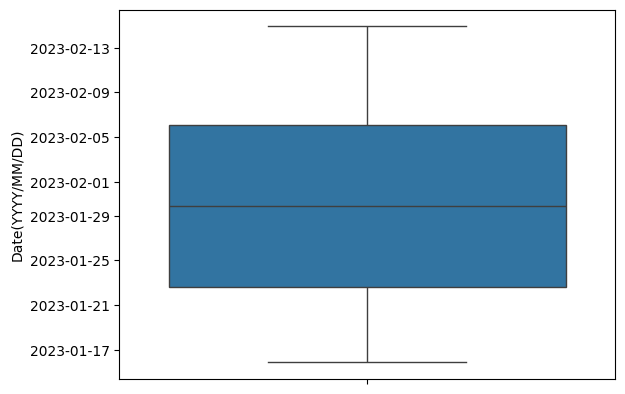

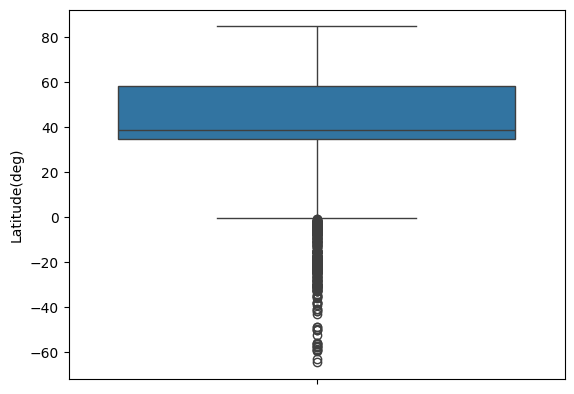

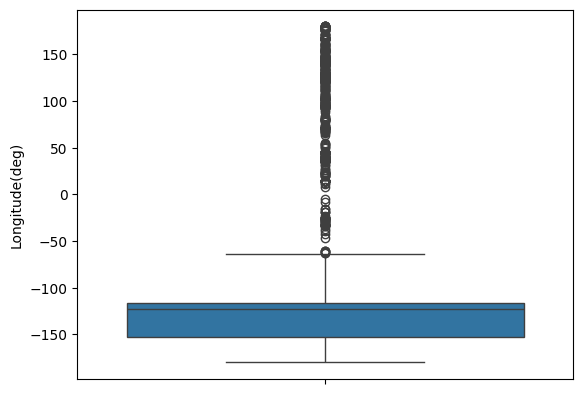

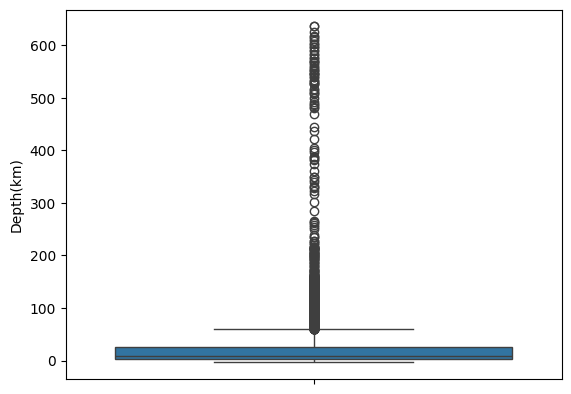

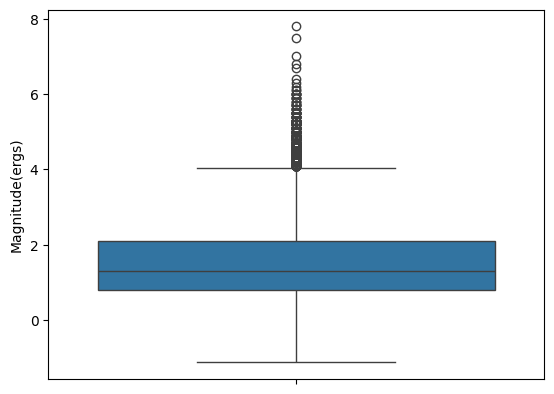

In [75]:


df['Magnitude_type'].unique()

Col1= ["Date(YYYY/MM/DD)", "Latitude(deg)", "Longitude(deg)", "Depth(km)", "Magnitude(ergs)", 
                    "Magnitude_type","EventID"]
for i in Col1:
    if df[i].dtype!='object':
        plt.figure()
        sns.boxplot(df[i])


In [76]:
col_outliers = [ "Latitude(deg)","Longitude(deg)", "Magnitude(ergs)", 
                    'Depth(km)']
for i in col_outliers:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    print(i,":",IQR)
# Defining the lower and upper bound for outliers
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    print(lower_bound)
    print()
    print(upper_bound)  
# Remove Outlier 
# method-1
    filter1 = df[i] > lower_bound
    filter2 = df[i] < upper_bound
    df_filtered = df[filter1 & filter2]

df=df_filtered    

Latitude(deg) : 23.534366666666706
-0.5912500000000662

93.54621666666677
Longitude(deg) : 35.60953330000001
-205.74399995000002

-63.30586674999998
Magnitude(ergs) : 1.3
-1.1500000000000001

4.050000000000001
Depth(km) : 22.490000000000002
-30.805

59.155


### Univariate analysis:

       Latitude(deg)  Longitude(deg)    Depth(km)  Magnitude(ergs)  \
count    8894.000000     8894.000000  8894.000000      8894.000000   
mean       41.459002     -115.551457    11.268123         1.518610   
std        16.726327       62.786414    12.333066         1.264891   
min       -64.428900     -179.782100    -3.490000        -1.120000   
25%        34.498333     -151.205325     2.440000         0.740000   
50%        38.823502     -122.796501     7.367776         1.200000   
75%        58.164842     -116.700283    13.795000         2.000000   
max        84.884100      179.970200    59.100000         7.800000   

       No_of_Stations          Gap        Close          RMS  
count     8894.000000  8894.000000  8894.000000  8894.000000  
mean        23.596171   119.444379     0.579990     0.273400  
std         19.479287    57.507691     1.536870     0.280172  
min          0.000000    15.000000     0.000000     0.000000  
25%         10.000000    77.000000     0.035290     0.

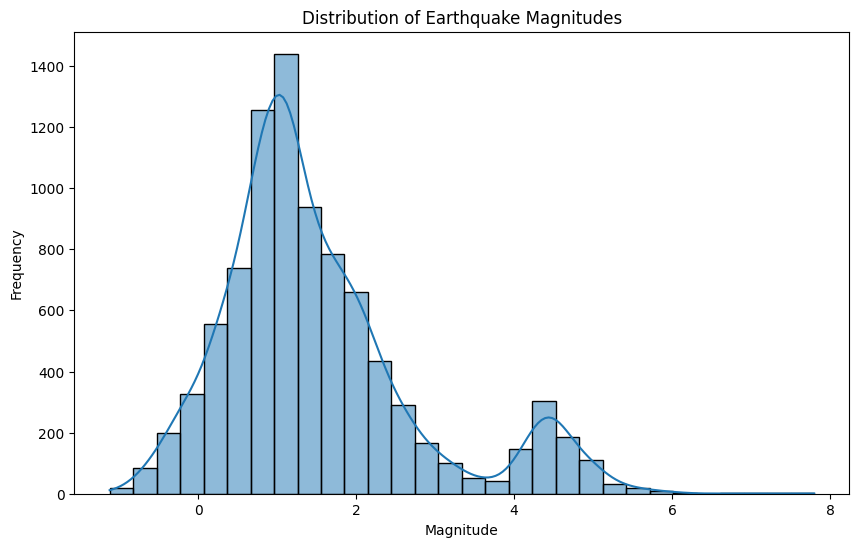

In [77]:
# General statistics
print(df.describe())

# Distribution of Magnitude
plt.figure(figsize=(10, 6))
sns.histplot(df['Magnitude(ergs)'], bins=30, kde=True)
plt.title('Distribution of Earthquake Magnitudes')
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.show()

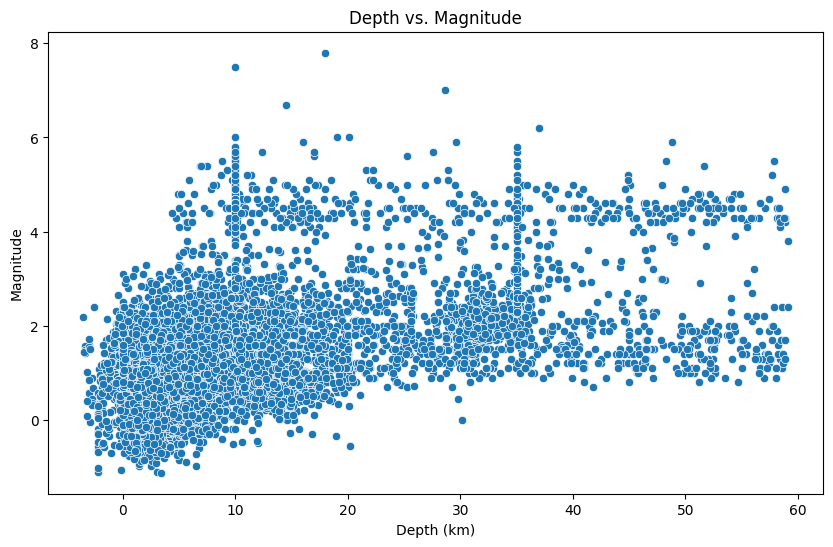

In [81]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Depth(km)', y='Magnitude(ergs)', data=df)
plt.title('Depth vs. Magnitude')
plt.xlabel('Depth (km)')
plt.ylabel('Magnitude')
plt.show()


C:\Users\Dell\AppData\Local\Temp\ipykernel_8176\2569165667.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date(YYYY/MM/DD)'])


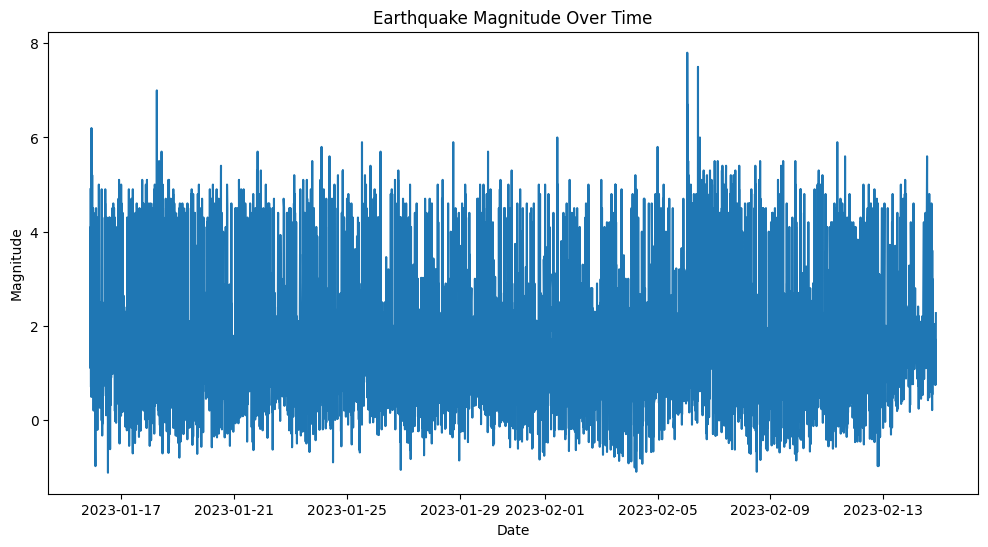

In [85]:
#  Time Series Plot of Magnitude

# Convert Date to datetime format

df['Date'] = pd.to_datetime(df['Date(YYYY/MM/DD)'])

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Magnitude(ergs)'])
plt.title('Earthquake Magnitude Over Time')
plt.xlabel('Date')
plt.ylabel('Magnitude')
plt.show()

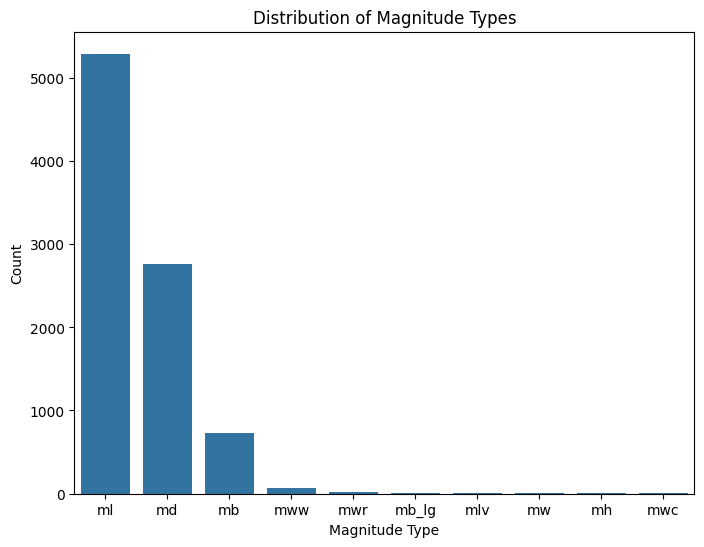

In [86]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Magnitude_type', data=df)
plt.title('Distribution of Magnitude Types')
plt.xlabel('Magnitude Type')
plt.ylabel('Count')
plt.show()

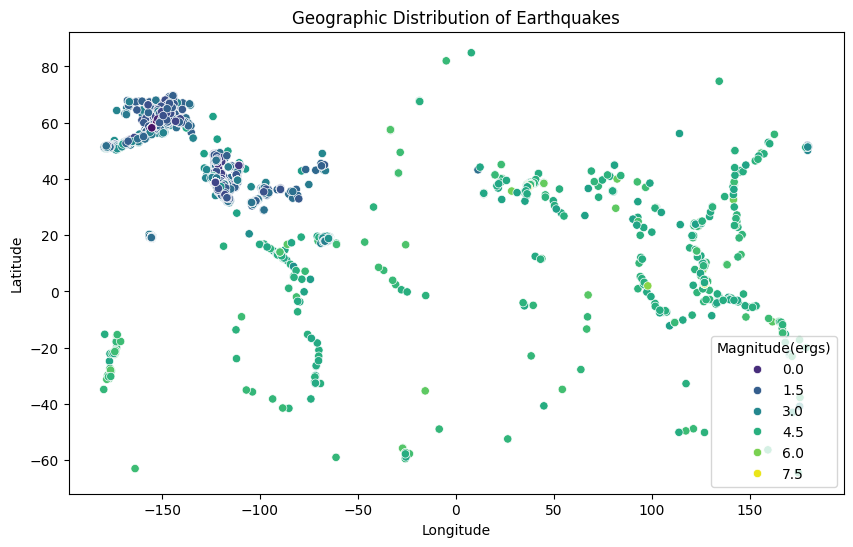

In [87]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Longitude(deg)', y='Latitude(deg)', hue='Magnitude(ergs)', data=df, palette='viridis')
plt.title('Geographic Distribution of Earthquakes')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


### Multivariate Analysis:

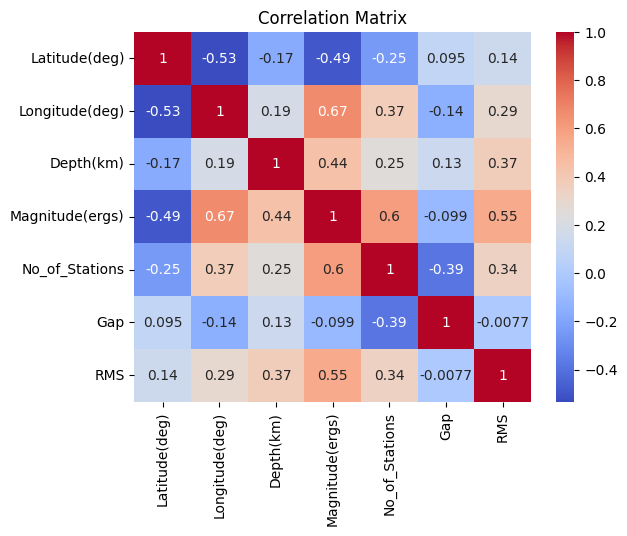

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the numerical columns for correlation analysis
numeric_cols = ['Latitude(deg)', 'Longitude(deg)', 'Depth(km)', 'Magnitude(ergs)', 'No_of_Stations', 'Gap', 'RMS']

# Create correlation matrix
corr_matrix = df[numeric_cols].corr()

# Plot heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


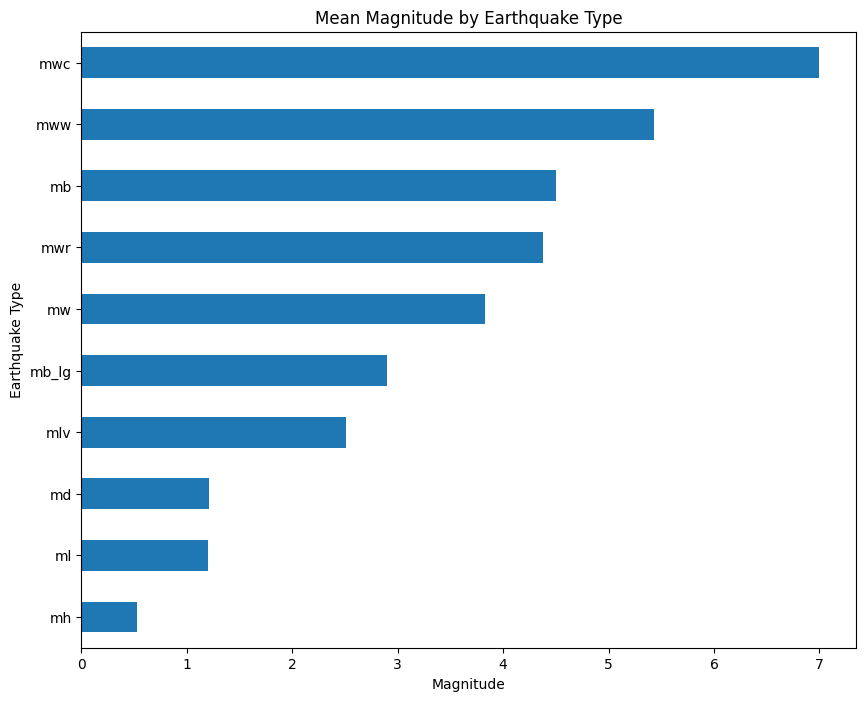

In [91]:

# Create a bar chart of the mean magnitude for each earthquake type
mean_mag_by_type = df.groupby('Magnitude_type')['Magnitude(ergs)'].mean().sort_values()
mean_mag_by_type.plot(kind='barh', figsize=(10,8))
plt.title('Mean Magnitude by Earthquake Type')
plt.xlabel('Magnitude')
plt.ylabel('Earthquake Type')
plt.show()

# Linear Regression

In [31]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Select the features we want to use
X = df[['Latitude(deg)','Longitude(deg)','Depth(km)','Gap']]
y = df['Magnitude(ergs)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model on the training set
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model on the testing set
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean squared error:', mse)
print('R-squared score:', r2)


Mean squared error: 0.7318282185361162
R-squared score: 0.5632730346912534


In [93]:
# Predict on new data
new_data = [[33.89, -118.40, 16.17, 11]]
new_pred = model.predict(new_data)
print("New predictions:", new_pred)

New predictions: [1.85595831]


D:\New folder\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Random forest Model

In [32]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pickle



# Prepare the input and target variables for the model
X = df[['Latitude(deg)','Longitude(deg)','Depth(km)']]
y = df['Magnitude(ergs)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest model and fit it to the training data
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Use the model to make predictions on the test data
y_pred = rf.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean squared error: ", mse)
print("R-squared score: ", r2)

# Save the model to a file
with open('random_forest_model1.pkl', 'wb') as file:
    pickle.dump(rf, file)

Mean squared error:  0.23816798930658079
R-squared score:  0.8578704939642665


In [33]:


import numpy as np
import pickle
import ipywidgets as widgets
from IPython.display import display

# Load the model from the file
with open('random_forest_model1.pkl', 'rb') as file:
    model = pickle.load(file)

# Create widgets for input fields
latitude = widgets.FloatText(description="Latitude:", value=0.0)
longitude = widgets.FloatText(description="Longitude:", value=0.0)
depth = widgets.FloatText(description="Depth (km):", value=0.0)
#year = widgets.IntText(description="Year:", value=2024)

# Button to trigger the prediction
button = widgets.Button(description="Predict Magnitude")

# Display output
output = widgets.Output()

# Function to handle button click event
def on_button_click(b):
    with output:
        output.clear_output()
        # Read input values
        lat = latitude.value
        lon = longitude.value
        dep = depth.value
        # Predict magnitude
        new_data = np.array([[lat, lon, dep]])
        predicted_mag = model.predict(new_data)
        print(f"The predicted magnitude of the earthquake using the Random Forest model is: {predicted_mag[0]}")

button.on_click(on_button_click)

# Display the form
display(latitude, longitude, depth, button, output)
# latitude = 34.05      # Example latitude
# longitude = -118.25   # Example longitude
# depth = 10.0          # Example depth in km
# year = 2024           

FloatText(value=0.0, description='Latitude:')

FloatText(value=0.0, description='Longitude:')

FloatText(value=0.0, description='Depth (km):')

Button(description='Predict Magnitude', style=ButtonStyle())

Output()

### Conclusion:
Based on our analysis of earthquake data collected from Dataset , we have found several interesting insights.

Firstly, we found that the depth of an earthquake is a major factor that contributes to the occurrence of earthquakes. Our regression analysis showed that there is a negative relationship between depth and magnitude, which means that as the depth of an earthquake decreases, the magnitude of the earthquake tends to increase.

We also found that there is a relationship between the latitude and longitude of an earthquake and its magnitude. The scatterplots showed that if latitude increases, then the density of magnitude decreases, and if longitude decreases, then the density of magnitude increases.

Additionally, we found that the type of earthquake can also be a factor in determining the magnitude of an earthquake. The Random Forest model showed that the type of earthquake is a significant factor in predicting the magnitude of an earthquake.

Based on our findings, we can recommend that future earthquake prevention and preparation efforts should focus on developing early warning systems that can detect earthquakes at different depths and predicting their magnitudes accurately. Additionally, since the type of earthquake is a significant factor in determining its magnitude, it is important to continue researching and understanding the different types of earthquakes to improve prediction models.

Overall, our analysis has provided some valuable insights into the factors that contribute to earthquakes and how we can improve our prediction and prevention efforts in the future.

# Shikha Singh and Jahnvi Chaurasia